In [1]:
# 모델명은 KakaoCrawling이며, 파라미터는 2개로 시작페이지, 끝 페이지로 구성되는 코드
import requests
from bs4 import BeautifulSoup
import pandas as pd
def KakaoCrawling(start_page, end_page):
  title_list = []
  data_list = [] # 날짜
  end_price = [] # 종가
  start_price = [] # 시가
  up_down_price = [] # 전일비
  top_price = [] # 고가
  below_price = [] # 저가
  trade_price = [] # 거래량
  for i in range(start_page, end_page + 1):
    url = 'https://finance.naver.com/item/sise_day.naver?code=352820&page=' + str(i)
    headers = {'User-Agent':'Mozilla/5.0'}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    # 증권 속성 추출
    title = soup.select('table.type2 > tr > th')
    if len(title_list) == 0:
      for i in title:
        title_list.append(i.text)
    # 수치 데이터 추출
    num_data = soup.select('tr > td > span.tah')
    num_data_list = []
    for i in num_data:
      num_data_list.append(i.text)
    # 특정 인덱스에 7를 나눈 후 나머지를 통해 각 증권 속성에 대한 데이터를 추출할 수 있음
    for idx, val in enumerate(num_data_list):
      if idx % 7 == 0: # 날짜
        data_list.append(val)
      elif idx % 7 == 1: # 종가
        end_price.append(int(val.replace(',','')))
      elif idx % 7 == 2: # 전일비
        up_down_price.append(int(val.strip().replace(',','')))
      elif idx % 7 == 3: # 시가
        start_price.append(int(val.replace(',','')))
      elif idx % 7 == 4: # 고가
        top_price.append(int(val.replace(',','')))
      elif idx % 7 == 5: # 저가
        below_price.append(int(val.replace(',','')))
      else: # 거래량
        trade_price.append(int(val.replace(',','')))
  up_down_price_result = []
  for i, j, k in zip(up_down_price, end_price, start_price):
    if j < k:
      up_down_price_result.append(-i)
    else:
      up_down_price_result.append(i)
  df_dic = {'날짜':data_list,'종가':end_price,'시가':start_price,'전일비':up_down_price_result,'고가':top_price,'저가':below_price,'거래량':trade_price}
  df = pd.DataFrame(df_dic)
  return df

In [2]:
# 모델 테스트1
KakaoCrawling(1, 8) # '하이브'에 대한 증권 페이지 1쪽 부터 8쪽

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.10.25,228500,233000,-3000,235500,227000,140031
1,2023.10.24,231500,232500,-2500,235500,226000,105953
2,2023.10.23,229000,224500,4500,234500,224500,141201
3,2023.10.20,224500,224000,3000,228000,222000,130309
4,2023.10.19,227500,230000,-6500,233500,227000,117136
...,...,...,...,...,...,...,...
75,2023.07.04,286000,280500,6500,291000,276500,325615
76,2023.07.03,279500,282500,-2000,284500,273000,263649
77,2023.06.30,281500,280500,2000,284500,276000,206049
78,2023.06.29,279500,284000,-5500,291000,278000,187764


In [3]:
# 모델 테스트2
KakaoCrawling(3, 12) # 페이지 3쪽 부터 12쪽

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.09.20,243000,243000,2000,246000,237000,203324
1,2023.09.19,245000,240500,3500,245500,239500,116313
2,2023.09.18,241500,243500,-3000,247000,241000,145548
3,2023.09.15,244500,244500,1500,246500,240000,137119
4,2023.09.14,246000,244000,4000,247000,240500,143362
...,...,...,...,...,...,...,...
95,2023.05.04,292500,295000,-2000,298000,284000,258060
96,2023.05.03,294500,285500,10000,303000,285000,573639
97,2023.05.02,284500,270500,14500,285000,269000,447119
98,2023.04.28,270000,264000,6000,277000,263000,248614


In [4]:
# 시각화 모델 생성
import matplotlib.pyplot as plt
def Visualize(df): # 그래프 순서: 날짜별 종가 변화, 날짜별 거래량 변화, 날짜별 전일비 변화
  plt.plot(df['날짜'], df['종가'])
  plt.scatter(df['날짜'], df['종가'])
  plt.xticks(ticks=df['날짜'], rotation = 45)
  plt.show()
  plt.plot(df['날짜'], df['거래량'])
  plt.scatter(df['날짜'], df['거래량'])
  plt.xticks(ticks = df['날짜'], rotation = 45)
  plt.show()
  color = []
  for i in df['전일비']:
    if i >= 0:
      color.append('red')
    else:
      color.append('blue')
  plt.bar(df['날짜'], df['전일비'], color = color)
  plt.xlabel('Date')
  plt.xticks(ticks = df['날짜'], rotation = 45)
  plt.show()

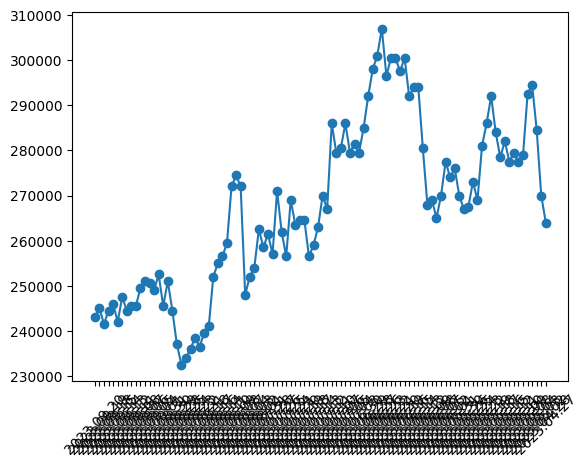

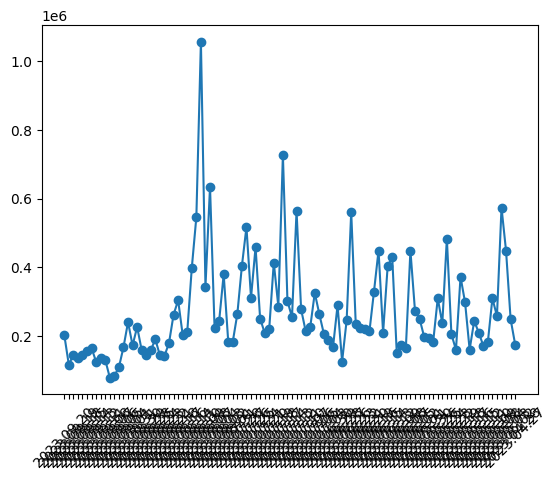

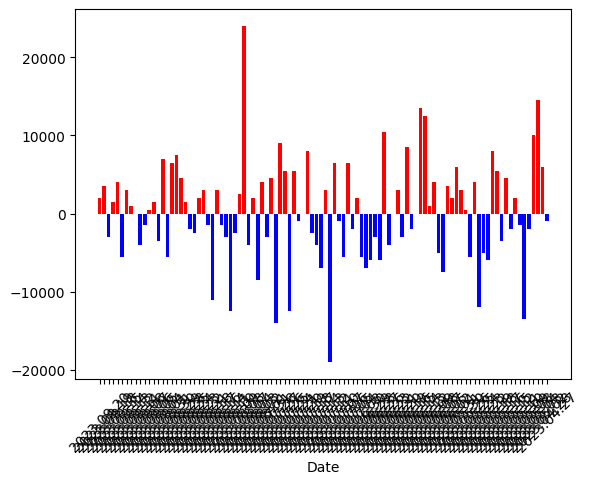

In [5]:
# 시각화 모델 테스트
data = KakaoCrawling(3, 12)
Visualize(data)